## Practical 1 - Additional information
In the practical you have learned to open netCDF files, subset and aggregate data(in space and time), and visualise it. But probably you are not quite sure how you did it. In the beginning, R just seems to work magically - or not. Here is some additional information to help you understand how R works and the logic behind the processing. 

### Object-oriented programming
R is an object-oriented programming language. This means that you can store information as objects. You can then access it and use functions to manipulate an object. You can recognise functions by the () brackets. In the example we create an object "vec" with 5 random numbers and call the function max() on this object which gives us the largest number in the vector. 

In [4]:
#install.packages("ncdf4")
vec <- runif(5, 0, 100)
vec

[1]  6.879078 80.469146 74.816902 26.076208 74.398296

In [5]:
# largest number in object
max(vec)

[1] 80.46915

### Indexing
A big part of the processing is accessing the information that your interested in. For example, you subsetted the ERA-5 temperature for the UK and calculated the monthly average temperatures. The process of accessing the parts of interest in an object is called indexing. There are multiple ways for indexing but they depend on the dimensions of the object.

### 1D: Vector

In [8]:
# Value of first element in vector
print("Vector:")
vec
print("First element of vector:")
vec[1]

[1] "Vector:"


[1]  6.879078 80.469146 74.816902 26.076208 74.398296

[1] "First element of vector:"


[1] 6.879078

In [10]:
# assign the first 3 elements to a new vector
new_vector <- vec[1:3]
new_vector

[1]  6.879078 80.469146 74.816902

### 2D: Matrix
The principles of indexing 2D data is similar, but we need to account for the second dimension. This is done by providing a second argument in the brackets - the position defines the row and the second the column.

In [11]:
# create a 2D object 
matr <- matrix(data = round(runif(100, 1, 50), 0), ncol = 10, nrow = 10)
matr

11,18,16,26,9,37,37,5,10,3
39,11,35,32,34,36,28,49,37,3
39,49,30,41,8,29,3,14,24,33
6,19,4,30,31,33,37,36,25,27
47,2,49,19,30,25,34,28,24,48
16,45,21,14,27,29,23,5,37,39
37,14,28,46,43,31,50,7,11,40
41,14,30,22,13,3,23,42,29,11
17,27,32,23,1,21,25,29,31,13
18,2,40,34,40,49,27,8,34,43


In [12]:
# Access the first row
matr[1, ]

[1] 11 18 16 26  9 37 37  5 10  3

In [13]:
# Access the 5th column
matr[, 5]

[1]  9 34  8 31 30 27 43 13  1 40

In [14]:
# Access row 2 to 5 of col 1 and 4
matr[c(2:5), c(1,4)]

39,32
39,41
6,30
47,19


It's possible (and very helpful) to give names to rows and columns and index that data through the names.

In [15]:
colnames(matr) <- c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J")
matr

A,B,C,D,E,F,G,H,I,J
11,18,16,26,9,37,37,5,10,3
39,11,35,32,34,36,28,49,37,3
39,49,30,41,8,29,3,14,24,33
6,19,4,30,31,33,37,36,25,27
47,2,49,19,30,25,34,28,24,48
16,45,21,14,27,29,23,5,37,39
37,14,28,46,43,31,50,7,11,40
41,14,30,22,13,3,23,42,29,11
17,27,32,23,1,21,25,29,31,13
18,2,40,34,40,49,27,8,34,43


In [16]:
# column F
matr[, "F"]

[1] 37 36 29 33 25 29 31  3 21 49

A raster (and any image) is basically a matrix with spatial reference. So, to access the information at a certain location you just need to provide the row and column where it's stored. 

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"

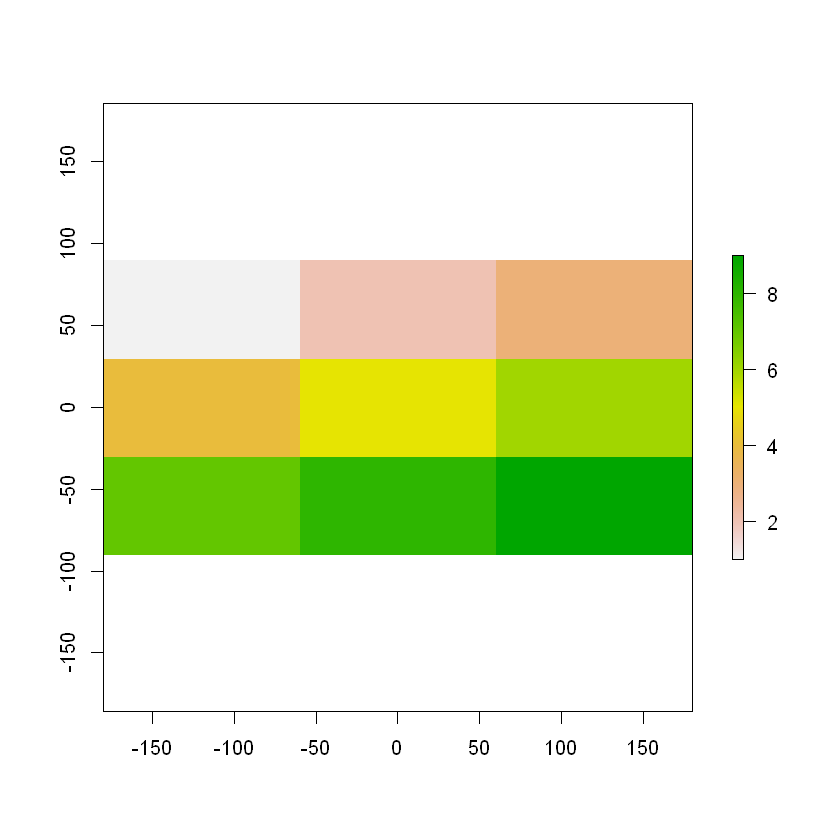

In [17]:
# Create a raster with 9 cells and values from 1 to 9 
library(raster)
r <- raster(ncol=3, nrow=3) # create empty raster
r[] <- 1:ncell(r) # fill it with values
plot(r) # have a quick look

In [18]:
# This is how the matrix of the raster looks
r_matrix <- raster::as.matrix(r)
r_matrix

1,2,3
4,5,6
7,8,9


In [19]:
# To access the centre cell value
r_matrix[2,2]

[1] 5

Raster have a spatial reference, so rather then indexing the position in the matrix we index the location. For this we create a point object with our location of interest and extract the raster value at the point location. Remember, you did this when you extracted the data of the UK and Durham. 

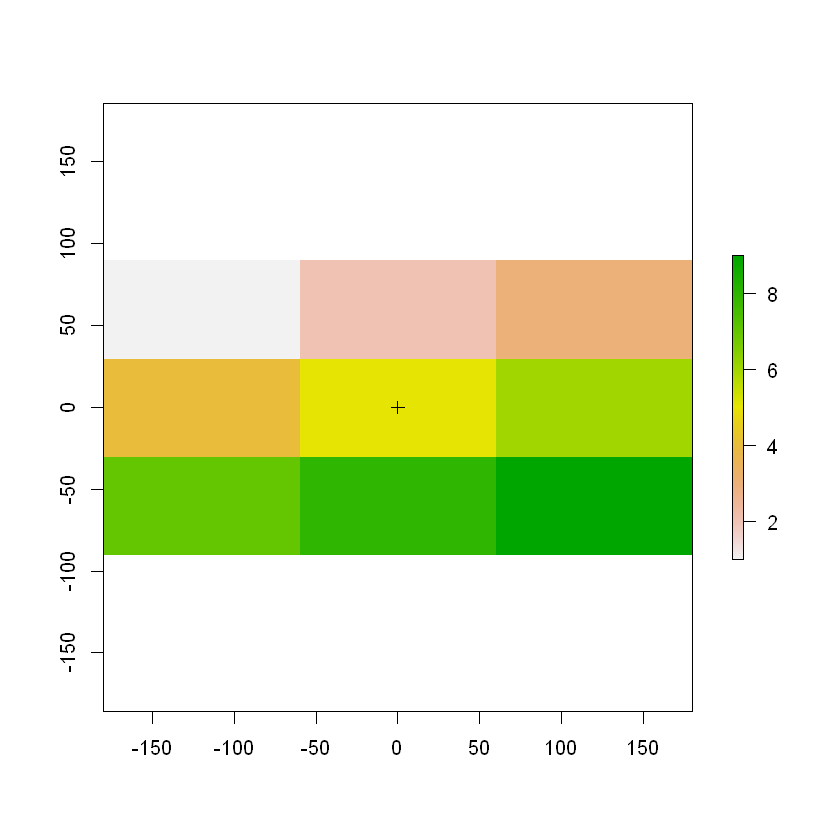

In [20]:
pointCoordinate <- data.frame(0,0) #provide the coordinates of the met station
colnames(pointCoordinate) <- c("lat", "long")
coordinates(pointCoordinate) = ~long+lat
plot(r)
plot(pointCoordinate, add = TRUE)

In [21]:
# Get the value at the point location
extract(r, pointCoordinate)

[1] 5

### 3D: Raster brick
The netCDF data and raster bricks have a 3rd dimension - in this case time but it also could be additional variables (i.e. precipitation, evapotranspiration...). In this example, we index the 3rd dimension of the UK raster brick. Picture the data as a cube with 142 layers (time) of size 48x56 (XxY).

In [22]:
# Create raster brick like in the Handout
setwd("F:/PhD/Work/Docs/Tutorial/2022/SCI_RES/Practical1_data")
temp_2m <- brick("ERA5_month_2010_2021.nc")
temp_degC <- temp_2m - 273.15
temp_rotate <- rotate(temp_degC)
extent <- c(-12, 2, 49, 61) # these are the bounding coordinates of the UK in degrees (xmin, xmax, ymin, ymax)
r_brick <- crop(temp_rotate, extent)

# Print the dimensions of the dataset
dim(r_brick)

Loading required namespace: ncdf4
Warning message in .rasterObjectFromCDF(x, type = objecttype, band = band, ...):
""level" set to 1 (there are 2 levels)"

[1]  48  56 142

To access a certain time period (a slice of the cube) we can either access the position or the name of the slice. Anyhow it is good to get some idea about the slices first. 

In [23]:
names(r_brick)

[1] "X2010.01.01.00.00.00" "X2010.02.01.00.00.00" "X2010.03.01.00.00.00"
  [4] "X2010.04.01.01.00.00" "X2010.05.01.01.00.00" "X2010.06.01.01.00.00"
  [7] "X2010.07.01.01.00.00" "X2010.08.01.01.00.00" "X2010.09.01.01.00.00"
 [10] "X2010.10.01.01.00.00" "X2010.11.01.00.00.00" "X2010.12.01.00.00.00"
 [13] "X2011.01.01.00.00.00" "X2011.02.01.00.00.00" "X2011.03.01.00.00.00"
 [16] "X2011.04.01.01.00.00" "X2011.05.01.01.00.00" "X2011.06.01.01.00.00"
 [19] "X2011.07.01.01.00.00" "X2011.08.01.01.00.00" "X2011.09.01.01.00.00"
 [22] "X2011.10.01.01.00.00" "X2011.11.01.00.00.00" "X2011.12.01.00.00.00"
 [25] "X2012.01.01.00.00.00" "X2012.02.01.00.00.00" "X2012.03.01.00.00.00"
 [28] "X2012.04.01.01.00.00" "X2012.05.01.01.00.00" "X2012.06.01.01.00.00"
 [31] "X2012.07.01.01.00.00" "X2012.08.01.01.00.00" "X2012.09.01.01.00.00"
 [34] "X2012.10.01.01.00.00" "X2012.11.01.00.00.00" "X2012.12.01.00.00.00"
 [37] "X2013.01.01.00.00.00" "X2013.02.01.00.00.00" "X2013.03.01.00.00.00"
 [40] "X2013.04.01.01.00.00" "X2013.05.01.01.00.00" "X2013.06.01.01.00.00"
 [43] "X2013.07.01.01.00.00" "X2013.08.01.01.00.00" "X2013.09.01.01.00.00"
 [46] "X2013.10.01.01.00.00" "X2013.11.01.00.00.00" "X2013.12.01.00.00.00"
 [49] "X2014.01.01.00.00.00" "X2014.02.01.00.00.00" "X2014.03.01.00.00.00"
 [52] "X2014.04.01.01.00.00" "X2014.05.01.01.00.00" "X2014.06.01.01.00.00"
 [55] "X2014.07.01.01.00.00" "X2014.08.01.01.00.00" "X2014.09.01.01.00.00"
 [58] "X2014.10.01.01.00.00" "X2014.11.01.00.00.00" "X2014.12.01.00.00.00"
 [61] "X2015.01.01.00.00.00" "X2015.02.01.00.00.00" "X2015.03.01.00.00.00"
 [64] "X2015.04.01.01.00.00" "X2015.05.01.01.00.00" "X2015.06.01.01.00.00"
 [67] "X2015.07.01.01.00.00" "X2015.08.01.01.00.00" "X2015.09.01.01.00.00"
 [70] "X2015.10.01.01.00.00" "X2015.11.01.00.00.00" "X2015.12.01.00.00.00"
 [73] "X2016.01.01.00.00.00" "X2016.02.01.00.00.00" "X2016.03.01.00.00.00"
 [76] "X2016.04.01.01.00.00" "X2016.05.01.01.00.00" "X2016.06.01.01.00.00"
 [79] "X2016.07.01.01.00.00" "X2016.08.01.01.00.00" "X2016.09.01.01.00.00"
 [82] "X2016.10.01.01.00.00" "X2016.11.01.00.00.00" "X2016.12.01.00.00.00"
 [85] "X2017.01.01.00.00.00" "X2017.02.01.00.00.00" "X2017.03.01.00.00.00"
 [88] "X2017.04.01.01.00.00" "X2017.05.01.01.00.00" "X2017.06.01.01.00.00"
 [91] "X2017.07.01.01.00.00" "X2017.08.01.01.00.00" "X2017.09.01.01.00.00"
 [94] "X2017.10.01.01.00.00" "X2017.11.01.00.00.00" "X2017.12.01.00.00.00"
 [97] "X2018.01.01.00.00.00" "X2018.02.01.00.00.00" "X2018.03.01.00.00.00"
[100] "X2018.04.01.01.00.00" "X2018.05.01.01.00.00" "X2018.06.01.01.00.00"
[103] "X2018.07.01.01.00.00" "X2018.08.01.01.00.00" "X2018.09.01.01.00.00"
[106] "X2018.10.01.01.00.00" "X2018.11.01.00.00.00" "X2018.12.01.00.00.00"
[109] "X2019.01.01.00.00.00" "X2019.02.01.00.00.00" "X2019.03.01.00.00.00"
[112] "X2019.04.01.01.00.00" "X2019.05.01.01.00.00" "X2019.06.01.01.00.00"
[115] "X2019.07.01.01.00.00" "X2019.08.01.01.00.00" "X2019.09.01.01.00.00"
[118] "X2019.10.01.01.00.00" "X2019.11.01.00.00.00" "X2019.12.01.00.00.00"
[121] "X2020.01.01.00.00.00" "X2020.02.01.00.00.00" "X2020.03.01.00.00.00"
[124] "X2020.04.01.01.00.00" "X2020.05.01.01.00.00" "X2020.06.01.01.00.00"
[127] "X2020.07.01.01.00.00" "X2020.08.01.01.00.00" "X2020.09.01.01.00.00"
[130] "X2020.10.01.01.00.00" "X2020.11.01.00.00.00" "X2020.12.01.00.00.00"
[133] "X2021.01.01.00.00.00" "X2021.02.01.00.00.00" "X2021.03.01.00.00.00"
[136] "X2021.04.01.01.00.00" "X2021.05.01.01.00.00" "X2021.06.01.01.00.00"
[139] "X2021.07.01.01.00.00" "X2021.08.01.01.00.00" "X2021.09.01.01.00.00"
[142] "X2021.10.01.01.00.00"

With this we can access the desired slices either from the position or the name:

[1] 48 56  1

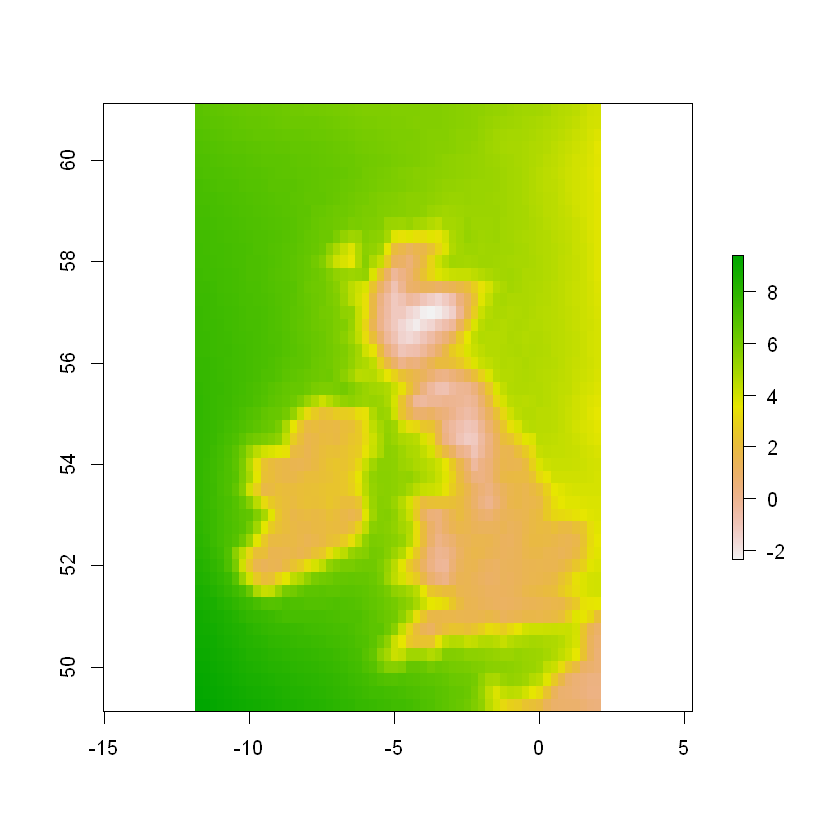

In [24]:
# Index by position: first slice of the dataset
r_jan_2010 <- r_brick[[1]]
dim(r_jan_2010) # print the dimensions to see if its really just one...
plot(r_jan_2010)

[1] 48 56  1

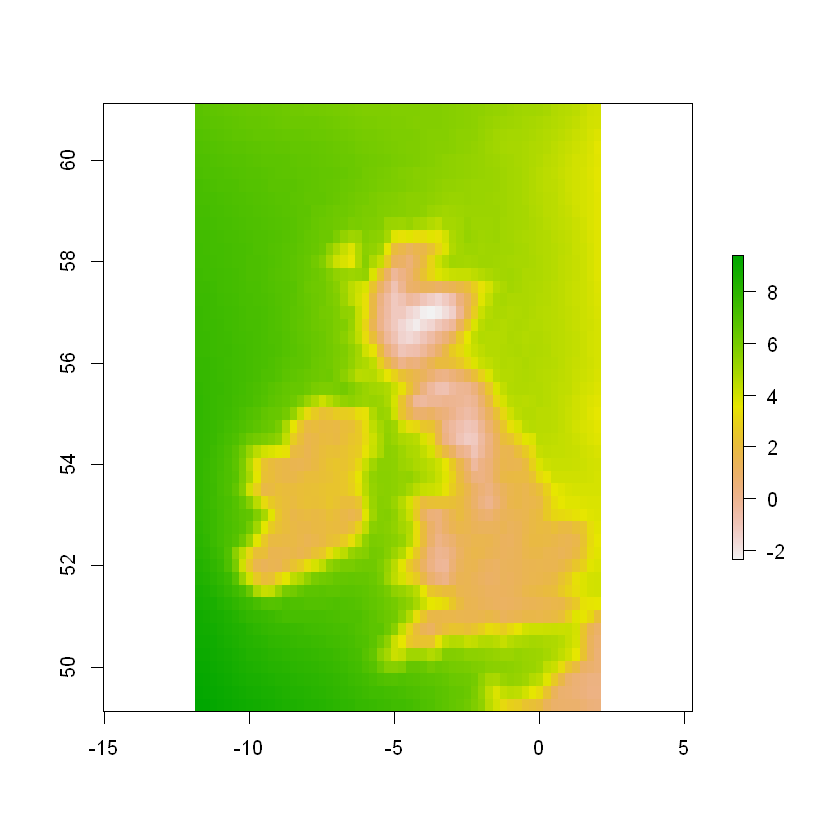

In [25]:
# Index by name
r_jan_2010 <- r_brick[["X2010.01.01.00.00.00"]]
dim(r_jan_2010) # print the dimensions to see if its really just one...
plot(r_jan_2010)

This way we can extract one or more slices of the raster brick. Now, it is also possible to index using a vector that stores the names or position of the desired slices. This is what we did for the monthly and yearly average temperature maps, but here is another example. 

In [26]:
# create a vector of the positions of the slices. In this case every January (Slice 1, 13, 25, etc)
vec <- seq(1, 142, 12)
vec

[1]   1  13  25  37  49  61  73  85  97 109 121 133

In [27]:
# extract the slices using the vector "vec" and assign to object r_brick_jan
r_brick_jan <- r_brick[[vec]]
dim(r_brick_jan)

[1] 48 56 12

This gives us a brick with the data of January for the years 2010 - 2021. We could calculate the maximum January temperature in the past 12 years by calling the max function on the january brick. By doing so we aggregate the stack to a simple raster with dimensions 48x56x1

[1] 48 56  1

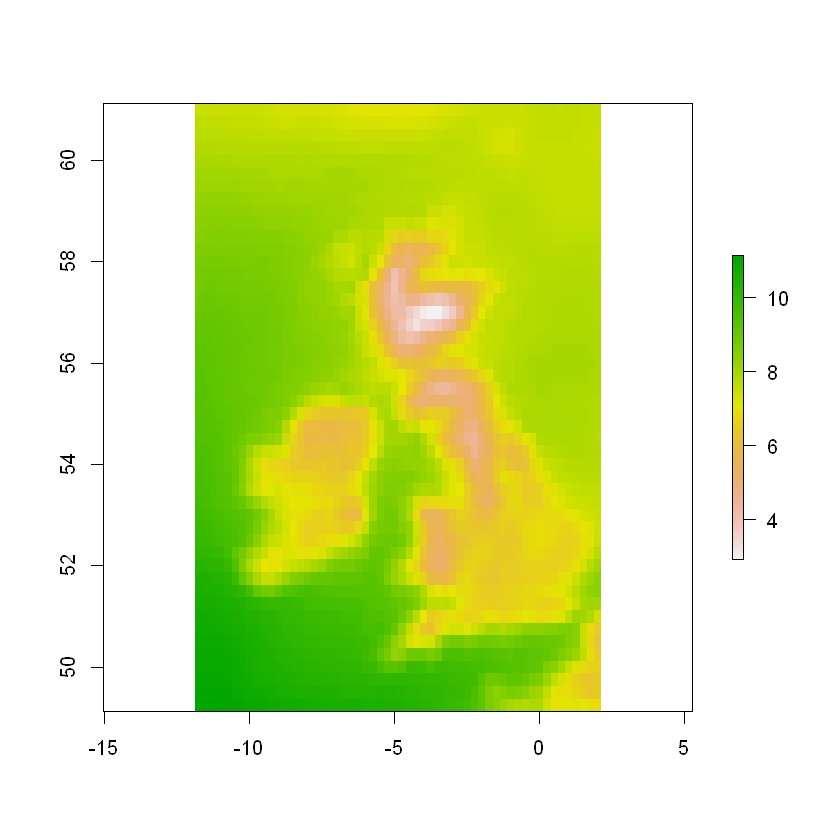

In [28]:
r_brick_jan_max <- max(r_brick_jan)
dim(r_brick_jan_max)
plot(r_brick_jan_max)

A great portion of the processing in this practical was to access the bits and pieces (in space and time) of interest. When you revisit the code, run it line by line and try to understand what happens. Basically it is always either:
- Indexing: Creating a subset (space and/or time) of your data
- Conduct operations on the data: Use of functions for specific tasks (i.e. calculations, plotting, renameing...) You can recognise functions by the () brackets, i.e. sum().

## Troubleshooting
Working with R and other programming languages can be frustrating at times. Errors are part of the process. Nobody writes flawless code that works on the first attempt. Writing a script is a try-and-error process, which is why it is important to check your data regularily. Has it the correct number of dimensions? Are the values resonable? It is quite useful to read the error messages - they point to the source of the problem. Most errors can be grouped into 3 categories:
- wrong names
- package not loaded
- wrong use of function
- errors in input data

In [29]:
# 1. wrong names
# Most common error and easy to fix. A few examples:
vec <- c(1:4)
sum(ve)

ERROR: Error in eval(expr, envir, enclos): Objekt 've' nicht gefunden


In [30]:
su(vec)

ERROR: Error in su(vec): konnte Funktion "su" nicht finden


In [32]:
# 2. Package not loaded
ggplot()

ERROR: Error in ggplot(): konnte Funktion "ggplot" nicht finden


In [33]:
# 3. Wrong use of function

# suppose we want to combine 2 vectors to one larger vector
# we can do this with the function append() which requires two vectors as input
a <- c(1:4)
b <- c(8:12)

# wrong use of function
c <- append(a)

ERROR: Error in append(a): Argument "values" fehlt (ohne Standardwert)


In [34]:
# right use
c <- append(a,b)
c

[1]  1  2  3  4  8  9 10 11 12

In [35]:
# always helpful for this kind of error is ?name_of_function()
?append # this will give you a description of the function


In [36]:
# 3. Wrong input data

# this type can be the most tricky to figure out. Something is wrong with your input object and you 
# need to revisit the steps where you created/manipulated the object. This error is mostly related to the problems with 
# the values, type or the size of the object

# Issues with data type 
a <- c(1:4)
b <- c("A", "B", "C", "D")
c <- (a + b) / 2

ERROR: Error in a + b: nicht-numerisches Argument für binären Operator


If you encounter an error assess it systematically. Is everything spelled correctly? Is the function loaded? Does the input data make sense? Is the function used correctly (remember: ?name_of_function()). If that doesn't help google the error message - you are never the first with the problem. 